# Nettoyage

In [566]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import mysql.connector as mysqlConnector


In [377]:
df = pd.read_csv("valeursfoncieres_2022.txt", delimiter="|", header=0)
pd.set_option('display.max_columns', 500)
df

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_24064\3796223369.py:1: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("valeursfoncieres_2022.txt", delimiter="|", header=0)


,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,"55000,00",13.0,NaN,RUE,2280,DE LA LIBERTE,1000.0,BOURG-EN-BRESSE,1,53,NaN,AM,102,NaN,7.0,"24,10",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,24.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,"143000,00",NaN,NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,398,NaN,ZE,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,"143000,00",NaN,NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,398,NaN,ZE,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,"143000,00",98.0,NaN,RTE,0055,DE LA DOMBES,1480.0,SAVIGNEUX,1,398,NaN,ZE,187,NaN,1.0,"123,23",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,140.0,3.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,"300,00",NaN,NaN,NaN,B031,AUX PIERRES,1480.0,MESSIMY SUR SAONE,1,243,NaN,A,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10/11/2022,Adjudication,"188100,00",2.0,NaN,AV,1467,DE CAMOENS,75016.0,PARIS 16,75,116,NaN,DS,54,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
4617586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10/11/2022,Adjudication,"2145000,00",2.0,NaN,AV,1467,DE CAMOENS,75016.0,PARIS 16,75,116,NaN,DS,54,NaN,3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,210.0,6.0,NaN,NaN,NaN
4617587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10/11/2022,Adjudication,"2145000,00",2.0,NaN,AV,1467,DE CAMOENS,75016.0,PARIS 16,75,116,NaN,DS,54,NaN,3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
4617588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,14/12/2022,Vente,"111000,00",18.0,NaN,RUE,6221,MAYET,75006.0,PARIS 06,75,106,NaN,BC,23,NaN,67,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,24.0,2.0,NaN,NaN,NaN


## Suppression des colonnes qui ont des valeurs NAN sur tout les lignes

In [378]:
df1 = df.isnull().sum(axis=0)
df1 

Identifiant de document       4617590
Reference document            4617590
1 Articles CGI                4617590
2 Articles CGI                4617590
3 Articles CGI                4617590
4 Articles CGI                4617590
5 Articles CGI                4617590
No disposition                      0
Date mutation                       0
Nature mutation                     0
Valeur fonciere                 31142
No voie                       1651541
B/T/Q                         4406247
Type de voie                  1765995
Code voie                       38521
Voie                            38675
Code postal                     38707
Commune                             0
Code departement                    0
Code commune                        0
Prefixe de section            4401405
Section                           158
No plan                             0
No Volume                     4607192
1er lot                       3119800
Surface Carrez du 1er lot     4198313
2eme lot    

In [379]:
df_clean = df.drop(["Identifiant de document","Reference document","1 Articles CGI","2 Articles CGI", "3 Articles CGI","4 Articles CGI","5 Articles CGI","Identifiant local"], axis=1)
pd.set_option('display.max_columns', 50)
df_clean

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,1,03/01/2022,Vente,"55000,00",13.0,NaN,RUE,2280,DE LA LIBERTE,1000.0,BOURG-EN-BRESSE,1,53,NaN,AM,102,NaN,7.0,"24,10",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,24.0,1.0,NaN,NaN,NaN
1,1,03/01/2022,Vente,"143000,00",NaN,NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,398,NaN,ZE,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,84.0
2,1,03/01/2022,Vente,"143000,00",NaN,NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,398,NaN,ZE,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,88.0
3,1,03/01/2022,Vente,"143000,00",98.0,NaN,RTE,0055,DE LA DOMBES,1480.0,SAVIGNEUX,1,398,NaN,ZE,187,NaN,1.0,"123,23",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,140.0,3.0,NaN,NaN,NaN
4,1,04/01/2022,Vente,"300,00",NaN,NaN,NaN,B031,AUX PIERRES,1480.0,MESSIMY SUR SAONE,1,243,NaN,A,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T,NaN,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617585,1,10/11/2022,Adjudication,"188100,00",2.0,NaN,AV,1467,DE CAMOENS,75016.0,PARIS 16,75,116,NaN,DS,54,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
4617586,1,10/11/2022,Adjudication,"2145000,00",2.0,NaN,AV,1467,DE CAMOENS,75016.0,PARIS 16,75,116,NaN,DS,54,NaN,3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,210.0,6.0,NaN,NaN,NaN
4617587,1,10/11/2022,Adjudication,"2145000,00",2.0,NaN,AV,1467,DE CAMOENS,75016.0,PARIS 16,75,116,NaN,DS,54,NaN,3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
4617588,1,14/12/2022,Vente,"111000,00",18.0,NaN,RUE,6221,MAYET,75006.0,PARIS 06,75,106,NaN,BC,23,NaN,67,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,24.0,2.0,NaN,NaN,NaN


## Modification des types surfaces (de string a numerics)

In [380]:
#modification types surface
df_clean["Surface Carrez du 1er lot"] = pd.to_numeric(df_clean["Surface Carrez du 1er lot"].str.replace(',', '.'), errors='coerce')

In [381]:
df_clean["Surface Carrez du 2eme lot"] = pd.to_numeric(df_clean["Surface Carrez du 2eme lot"].str.replace(',', '.'), errors='coerce')

In [382]:
df_clean["Surface Carrez du 3eme lot"] = pd.to_numeric(df_clean["Surface Carrez du 3eme lot"].str.replace(',', '.'), errors='coerce')

In [383]:
df_clean["Surface Carrez du 4eme lot"] = pd.to_numeric(df_clean["Surface Carrez du 4eme lot"].str.replace(',', '.'), errors='coerce')

In [384]:
df_clean["Surface Carrez du 5eme lot"] = pd.to_numeric(df_clean["Surface Carrez du 5eme lot"].str.replace(',', '.'), errors='coerce')

## Remplacement des valurs NAN sur les surfaces par 0

In [385]:
df_clean["Surface Carrez du 1er lot"].fillna(0, inplace=True)

In [386]:
df_clean["Surface Carrez du 2eme lot"].fillna(0, inplace=True)

In [387]:
df_clean["Surface Carrez du 3eme lot"].fillna(0, inplace=True)

In [388]:
df_clean["Surface Carrez du 4eme lot"].fillna(0, inplace=True)

In [389]:
df_clean["Surface Carrez du 5eme lot"].fillna(0, inplace=True)

## Ajout somme des 4 surface et la suppression des 4 colonnes

In [390]:
df_clean["Somme_4_surface_carrez"] = df_clean["Surface Carrez du 2eme lot"] + df_clean["Surface Carrez du 3eme lot"] + df_clean["Surface Carrez du 4eme lot"] + df_clean["Surface Carrez du 4eme lot"]

In [391]:
df_clean = df_clean.drop(["Surface Carrez du 3eme lot", "Surface Carrez du 2eme lot", "Surface Carrez du 4eme lot", "Surface Carrez du 5eme lot", "2eme lot", "3eme lot", "4eme lot", "5eme lot"], axis=1)
df_clean

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Somme_4_surface_carrez
0,1,03/01/2022,Vente,"55000,00",13.0,NaN,RUE,2280,DE LA LIBERTE,1000.0,BOURG-EN-BRESSE,1,53,NaN,AM,102,NaN,7.0,24.10,1,2.0,Appartement,24.0,1.0,NaN,NaN,NaN,0.0
1,1,03/01/2022,Vente,"143000,00",NaN,NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,398,NaN,ZE,184,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,S,NaN,84.0,0.0
2,1,03/01/2022,Vente,"143000,00",NaN,NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,398,NaN,ZE,185,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,S,NaN,88.0,0.0
3,1,03/01/2022,Vente,"143000,00",98.0,NaN,RTE,0055,DE LA DOMBES,1480.0,SAVIGNEUX,1,398,NaN,ZE,187,NaN,1.0,123.23,1,2.0,Appartement,140.0,3.0,NaN,NaN,NaN,0.0
4,1,04/01/2022,Vente,"300,00",NaN,NaN,NaN,B031,AUX PIERRES,1480.0,MESSIMY SUR SAONE,1,243,NaN,A,643,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,T,NaN,510.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617585,1,10/11/2022,Adjudication,"188100,00",2.0,NaN,AV,1467,DE CAMOENS,75016.0,PARIS 16,75,116,NaN,DS,54,NaN,27,0.00,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN,0.0
4617586,1,10/11/2022,Adjudication,"2145000,00",2.0,NaN,AV,1467,DE CAMOENS,75016.0,PARIS 16,75,116,NaN,DS,54,NaN,3,0.00,2,2.0,Appartement,210.0,6.0,NaN,NaN,NaN,0.0
4617587,1,10/11/2022,Adjudication,"2145000,00",2.0,NaN,AV,1467,DE CAMOENS,75016.0,PARIS 16,75,116,NaN,DS,54,NaN,3,0.00,2,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN,0.0
4617588,1,14/12/2022,Vente,"111000,00",18.0,NaN,RUE,6221,MAYET,75006.0,PARIS 06,75,106,NaN,BC,23,NaN,67,0.00,2,2.0,Appartement,24.0,2.0,NaN,NaN,NaN,0.0


## Ajout d'une colonne Adress

In [392]:
df_clean["No voie"] = df_clean["No voie"].astype(str)

In [393]:
df_clean["Code postal"] = df_clean["Code postal"].astype(str)

In [394]:
df_clean["No voie"].fillna("Pas definie ", inplace= True)

In [395]:
df_clean["Type de voie"].fillna("Pas definie", inplace= True)

In [396]:
df_clean["Voie"].fillna("Pas definie", inplace= True)

In [397]:
df_clean["Code postal"].fillna(" ", inplace= True)

In [398]:
df_clean["Adress"] = df_clean["No voie"] + " " + df_clean["Type de voie"] + "  " + df_clean["Voie"] + ", " + df_clean["Code postal"]

In [399]:
df_clean.drop(["No voie", "Type de voie", "Voie"], axis=1)

,No disposition,Date mutation,Nature mutation,Valeur fonciere,B/T/Q,Code voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Somme_4_surface_carrez,Adress
0,1,03/01/2022,Vente,"55000,00",NaN,2280,1000.0,BOURG-EN-BRESSE,1,53,NaN,AM,102,NaN,7.0,24.10,1,2.0,Appartement,24.0,1.0,NaN,NaN,NaN,0.0,"13.0 RUE DE LA LIBERTE, 1000.0"
1,1,03/01/2022,Vente,"143000,00",NaN,B010,1480.0,SAVIGNEUX,1,398,NaN,ZE,184,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,S,NaN,84.0,0.0,"nan Pas definie CHAMP COCHET, 1480.0"
2,1,03/01/2022,Vente,"143000,00",NaN,B010,1480.0,SAVIGNEUX,1,398,NaN,ZE,185,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,S,NaN,88.0,0.0,"nan Pas definie CHAMP COCHET, 1480.0"
3,1,03/01/2022,Vente,"143000,00",NaN,0055,1480.0,SAVIGNEUX,1,398,NaN,ZE,187,NaN,1.0,123.23,1,2.0,Appartement,140.0,3.0,NaN,NaN,NaN,0.0,"98.0 RTE DE LA DOMBES, 1480.0"
4,1,04/01/2022,Vente,"300,00",NaN,B031,1480.0,MESSIMY SUR SAONE,1,243,NaN,A,643,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,T,NaN,510.0,0.0,"nan Pas definie AUX PIERRES, 1480.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617585,1,10/11/2022,Adjudication,"188100,00",NaN,1467,75016.0,PARIS 16,75,116,NaN,DS,54,NaN,27,0.00,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN,0.0,"2.0 AV DE CAMOENS, 75016.0"
4617586,1,10/11/2022,Adjudication,"2145000,00",NaN,1467,75016.0,PARIS 16,75,116,NaN,DS,54,NaN,3,0.00,2,2.0,Appartement,210.0,6.0,NaN,NaN,NaN,0.0,"2.0 AV DE CAMOENS, 75016.0"
4617587,1,10/11/2022,Adjudication,"2145000,00",NaN,1467,75016.0,PARIS 16,75,116,NaN,DS,54,NaN,3,0.00,2,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN,0.0,"2.0 AV DE CAMOENS, 75016.0"
4617588,1,14/12/2022,Vente,"111000,00",NaN,6221,75006.0,PARIS 06,75,106,NaN,BC,23,NaN,67,0.00,2,2.0,Appartement,24.0,2.0,NaN,NaN,NaN,0.0,"18.0 RUE MAYET, 75006.0"


# Creation des dataframes (tables)

## Creation dataframe bien et transformation en table 

In [400]:
#creation table bien
bien = pd.DataFrame(df_clean[["No disposition", "Code type local", "Type local", "Surface terrain", "Surface reelle bati","Nombre pieces principales", "Nature culture", "Nature culture speciale"]])
bien

,No disposition,Code type local,Type local,Surface terrain,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale
0,1,2.0,Appartement,NaN,24.0,1.0,NaN,NaN
1,1,NaN,NaN,84.0,NaN,NaN,S,NaN
2,1,NaN,NaN,88.0,NaN,NaN,S,NaN
3,1,2.0,Appartement,NaN,140.0,3.0,NaN,NaN
4,1,NaN,NaN,510.0,NaN,NaN,T,NaN
...,...,...,...,...,...,...,...,...
4617585,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN
4617586,1,2.0,Appartement,NaN,210.0,6.0,NaN,NaN
4617587,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN
4617588,1,2.0,Appartement,NaN,24.0,2.0,NaN,NaN


In [401]:
bien.duplicated().sum()

3712056

In [402]:
bien.drop_duplicates()

,No disposition,Code type local,Type local,Surface terrain,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale
0,1,2.0,Appartement,NaN,24.0,1.0,NaN,NaN
1,1,NaN,NaN,84.0,NaN,NaN,S,NaN
2,1,NaN,NaN,88.0,NaN,NaN,S,NaN
3,1,2.0,Appartement,NaN,140.0,3.0,NaN,NaN
4,1,NaN,NaN,510.0,NaN,NaN,T,NaN
...,...,...,...,...,...,...,...,...
4617374,1,1.0,Maison,163.0,180.0,8.0,S,NaN
4617562,1,2.0,Appartement,2323.0,33.0,1.0,S,NaN
4617566,1,2.0,Appartement,2323.0,103.0,5.0,S,NaN
4617567,1,2.0,Appartement,2323.0,47.0,3.0,S,NaN


In [403]:
from sqlalchemy import create_engine

# Définir les informations de connexion à votre base de données MySQL
user = 'root'
password = ''
host = 'localhost'
database = 'data_centric'       #le creer d'abord sur mysql

# Créer une connexion à votre base de données MySQL
conn = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

# Nom de la table dans laquelle vous souhaitez insérer les données
table_name = 'bien'    

# Insérer les données du DataFrame dans la table MySQL
bien.to_sql(name=table_name, con=conn, if_exists='append', index=False)

# Fermer la connexion à la base de données
conn.dispose()

IntegrityError: (pymysql.err.IntegrityError) (1452, 'Cannot add or update a child row: a foreign key constraint fails (`data_centric`.`bien`, CONSTRAINT `fk_localiation` FOREIGN KEY (`id_bien`) REFERENCES `localisation` (`id_localisation`))')
[SQL: INSERT INTO bien (`No disposition`, `Code type local`, `Type local`, `Surface terrain`, `Surface reelle bati`, `Nombre pieces principales`, `Nature culture`, `Nature culture speciale`) VALUES (%(No_disposition)s, %(Code_type_local)s, %(Type_local)s, %(Surface_terrain)s, %(Surface_reelle_bati)s, %(Nombre_pieces_principales)s, %(Nature_culture)s, %(Nature_culture_speciale)s)]
[parameters: [{'No_disposition': 1, 'Code_type_local': 2.0, 'Type_local': 'Appartement', 'Surface_terrain': None, 'Surface_reelle_bati': 24.0, 'Nombre_pieces_principales': 1.0, 'Nature_culture': None, 'Nature_culture_speciale': None}, {'No_disposition': 1, 'Code_type_local': None, 'Type_local': None, 'Surface_terrain': 84.0, 'Surface_reelle_bati': None, 'Nombre_pieces_principales': None, 'Nature_culture': 'S', 'Nature_culture_speciale': None}, {'No_disposition': 1, 'Code_type_local': None, 'Type_local': None, 'Surface_terrain': 88.0, 'Surface_reelle_bati': None, 'Nombre_pieces_principales': None, 'Nature_culture': 'S', 'Nature_culture_speciale': None}, {'No_disposition': 1, 'Code_type_local': 2.0, 'Type_local': 'Appartement', 'Surface_terrain': None, 'Surface_reelle_bati': 140.0, 'Nombre_pieces_principales': 3.0, 'Nature_culture': None, 'Nature_culture_speciale': None}, {'No_disposition': 1, 'Code_type_local': None, 'Type_local': None, 'Surface_terrain': 510.0, 'Surface_reelle_bati': None, 'Nombre_pieces_principales': None, 'Nature_culture': 'T', 'Nature_culture_speciale': None}, {'No_disposition': 1, 'Code_type_local': 1.0, 'Type_local': 'Maison', 'Surface_terrain': 649.0, 'Surface_reelle_bati': 108.0, 'Nombre_pieces_principales': 5.0, 'Nature_culture': 'S', 'Nature_culture_speciale': None}, {'No_disposition': 1, 'Code_type_local': None, 'Type_local': None, 'Surface_terrain': 360.0, 'Surface_reelle_bati': None, 'Nombre_pieces_principales': None, 'Nature_culture': 'S', 'Nature_culture_speciale': None}, {'No_disposition': 1, 'Code_type_local': None, 'Type_local': None, 'Surface_terrain': 50.0, 'Surface_reelle_bati': None, 'Nombre_pieces_principales': None, 'Nature_culture': 'S', 'Nature_culture_speciale': None}  ... displaying 10 of 4617590 total bound parameter sets ...  {'No_disposition': 1, 'Code_type_local': 2.0, 'Type_local': 'Appartement', 'Surface_terrain': None, 'Surface_reelle_bati': 24.0, 'Nombre_pieces_principales': 2.0, 'Nature_culture': None, 'Nature_culture_speciale': None}, {'No_disposition': 1, 'Code_type_local': None, 'Type_local': None, 'Surface_terrain': None, 'Surface_reelle_bati': None, 'Nombre_pieces_principales': None, 'Nature_culture': None, 'Nature_culture_speciale': None}]]
(Background on this error at: https://sqlalche.me/e/20/gkpj)

## Dataframe localisation

In [533]:
#creation table localisation
localisation = pd.DataFrame(df_clean[["Adress", "B/T/Q", "Code voie", "Code postal", "Commune", "Code departement", "Code commune", "Section", "Prefixe de section", "No plan", "No Volume"]]) 
localisation

,Adress,B/T/Q,Code voie,Code postal,Commune,Code departement,Code commune,Section,Prefixe de section,No plan,No Volume
0,"13.0 RUE DE LA LIBERTE, 1000.0",NaN,2280,1000.0,BOURG-EN-BRESSE,1,53,AM,NaN,102,NaN
1,"nan Pas definie CHAMP COCHET, 1480.0",NaN,B010,1480.0,SAVIGNEUX,1,398,ZE,NaN,184,NaN
2,"nan Pas definie CHAMP COCHET, 1480.0",NaN,B010,1480.0,SAVIGNEUX,1,398,ZE,NaN,185,NaN
3,"98.0 RTE DE LA DOMBES, 1480.0",NaN,0055,1480.0,SAVIGNEUX,1,398,ZE,NaN,187,NaN
4,"nan Pas definie AUX PIERRES, 1480.0",NaN,B031,1480.0,MESSIMY SUR SAONE,1,243,A,NaN,643,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4617585,"2.0 AV DE CAMOENS, 75016.0",NaN,1467,75016.0,PARIS 16,75,116,DS,NaN,54,NaN
4617586,"2.0 AV DE CAMOENS, 75016.0",NaN,1467,75016.0,PARIS 16,75,116,DS,NaN,54,NaN
4617587,"2.0 AV DE CAMOENS, 75016.0",NaN,1467,75016.0,PARIS 16,75,116,DS,NaN,54,NaN
4617588,"18.0 RUE MAYET, 75006.0",NaN,6221,75006.0,PARIS 06,75,106,BC,NaN,23,NaN


In [ ]:
localisation.duplicated().sum()

In [ ]:
localisation.drop_duplicates()

In [ ]:
#user = 'root'
#password = ''
#host = 'localhost'
#database = 'data_centric'       

conn = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

table_name = 'localisation'    

localisation.to_sql(name=table_name, con=conn, if_exists='append', index=False)

conn.dispose()

In [ ]:
conn = mysqlConnector.connect(host='Localhost', port='3306', user='root',passwd='', database='data_centric')
cur = conn.cursor()


In [ ]:
cur.execute("SHOW DATABASES")
for row in cur:
    print(row)

In [ ]:
#query = '''data_centric '''
cur.execute("USE data_centric")

## Dataframe vente

In [595]:
#creation table ventes
vente = pd.DataFrame(df_clean[["Valeur fonciere", "Date mutation", "Nature mutation"]])
vente.dtypes

Valeur fonciere    object
Date mutation      object
Nature mutation    object
dtype: object

In [596]:
vente.duplicated().sum()

3896163

In [597]:
vente.drop_duplicates()

,Valeur fonciere,Date mutation,Nature mutation
0,"55000,00",03/01/2022,Vente
1,"143000,00",03/01/2022,Vente
4,"300,00",04/01/2022,Vente
5,"255000,00",06/01/2022,Vente
7,"525000,00",03/01/2022,Vente
...,...,...,...
4617582,"310000,00",01/12/2022,Adjudication
4617584,"81400,00",10/11/2022,Adjudication
4617585,"188100,00",10/11/2022,Adjudication
4617586,"2145000,00",10/11/2022,Adjudication


In [598]:
vente['Date mutation'] = pd.to_datetime(vente['Date mutation'], format='%d/%m/%Y')

In [600]:
vente['Valeur fonciere'] = vente['Valeur fonciere'].str.replace(',', '.')

In [601]:
vente['Valeur fonciere'] = vente['Valeur fonciere'].astype(float)

In [602]:
vente.head(10)

,Valeur fonciere,Date mutation,Nature mutation
0,55000.0,2022-01-03,Vente
1,143000.0,2022-01-03,Vente
2,143000.0,2022-01-03,Vente
3,143000.0,2022-01-03,Vente
4,300.0,2022-01-04,Vente
5,255000.0,2022-01-06,Vente
6,255000.0,2022-01-06,Vente
7,525000.0,2022-01-03,Vente
8,525000.0,2022-01-03,Vente
9,525000.0,2022-01-03,Vente


In [603]:
vente.dtypes

Valeur fonciere           float64
Date mutation      datetime64[ns]
Nature mutation            object
dtype: object

In [604]:
conn = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

table_name = 'vente'    

vente.to_sql(name=table_name, con=conn, if_exists='append', index=False)

conn.dispose()

## Dataframe lot

In [ ]:
#creation table lot
lot = pd.DataFrame(df_clean[["1er lot", "Surface Carrez du 1er lot", "Nombre de lots", "Somme_4_surface_carrez"]])
lot

In [ ]:
lot.duplicated().sum()

In [ ]:
lot.drop_duplicates()

In [ ]:
conn = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

table_name = 'lot'    

lot.to_sql(name=table_name, con=conn, if_exists='append', index=False)

conn.dispose()

# sql

## Importation 

In [ ]:
#user = 'root'
#password = ''
#host = 'localhost'
#database = 'data_centric'       

conn = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

table_name = 'localisation'    

localisation.to_sql(name=table_name, con=conn, if_exists='append', index=False)

conn.dispose()

In [ ]:
conn = mysqlConnector.connect(host='Localhost', port='3306', user='root',passwd='', database='data_centric')
cur = conn.cursor()

cur.execute("SHOW DATABASES")
for row in cur:
    print(row)

In [ ]:
cur.execute("USE data_centric")

## Requetes

In [405]:
te = """ select * from localisation limit 10 """
te = pd.read_sql(te, conn)
te

,id_localisation,Adress,B/T/Q,Code voie,Code postal,Commune,Code departement,Code commune,Section,Prefixe de section,No plan,No Volume
0,1,"13.0 RUE DE LA LIBERTE, 1000.0",None,2280,1000.0,BOURG-EN-BRESSE,1,53,AM,None,102,None
1,2,"nan Pas definie CHAMP COCHET, 1480.0",None,B010,1480.0,SAVIGNEUX,1,398,ZE,None,184,None
2,3,"nan Pas definie CHAMP COCHET, 1480.0",None,B010,1480.0,SAVIGNEUX,1,398,ZE,None,185,None
3,4,"98.0 RTE DE LA DOMBES, 1480.0",None,0055,1480.0,SAVIGNEUX,1,398,ZE,None,187,None
4,5,"nan Pas definie AUX PIERRES, 1480.0",None,B031,1480.0,MESSIMY SUR SAONE,1,243,A,None,643,None
5,6,"282.0 RTE DE POISATON, 1560.0",None,0130,1560.0,MANTENAY-MONTLIN,1,230,ZM,None,124,None
6,7,"nan Pas definie LA FREGONIERE, 1560.0",None,B047,1560.0,MANTENAY-MONTLIN,1,230,ZM,None,126,None
7,8,"nan PL DE LA CROIX BLANCHE, 1390.0",None,0300,1390.0,SAINT-ANDRE-DE-CORCY,1,333,AN,None,23,None
8,9,"217.0 PL DE LA CROIX BLANCHE, 1390.0",None,0300,1390.0,SAINT-ANDRE-DE-CORCY,1,333,AN,None,186,None
9,10,"217.0 PL DE LA CROIX BLANCHE, 1390.0",None,0300,1390.0,SAINT-ANDRE-DE-CORCY,1,333,AN,None,186,None


In [ ]:
aj = """ alter table localisation ADD FOREIGN key (id_bien_fk) references bien (id_bien) """
aj = pd.read_sql(aj, conn)
aj


In [ ]:
ajj = """alter table bien add column Fkey_id_localisation INT,  ADD CONSTRAINT Fkey_id_localisation FOREIGN KEY (Fkey_id_localisation) REFERENCES localisation (id_localisation) , ENGINE = innoDB """
ajj = pd.read_sql(ajj, conn)
ajj

In [ ]:
te = """ select * from  bien limit 50 """
te = pd.read_sql(te, conn)
te

## 1) Nombre d’appartements et Maisons vendus en 2020

In [742]:
q1 = """ SELECT count(*) as nombre from bien as b INNER JOIN vente as v ON  b.id_bien = v.id_vente 
where (`Type local` = 'Appartement' OR `Type local` = 'Maison' ) AND `Nature mutation` = 'Vente'; """
q1 = pd.read_sql(q1, conn)
q1

,nombre
0,1378948


## 2/ Nombre de biens vendus par trimestre

In [743]:
q2 = """select  count(*) as nombre_de_bien_t1 FROM vente as v INNER JOIN bien as b ON v.id_vente = b.id_bien 
WHERE Month(`Date mutation`) BETWEEN 01 AND 03 LIMIT 10"""
q2 = pd.read_sql(q2, conn)
q2 = pd.DataFrame(q2)
q2

,nombre_de_bien_t1
0,1068757


In [744]:
q2_t2 = """select  count(*) as nombre_de_bien_t2 FROM vente as v INNER JOIN bien as b ON v.id_vente = b.id_bien 
WHERE Month(`Date mutation`) BETWEEN 04 AND 06 LIMIT 10"""
q2_t2 = pd.read_sql(q2_t2, conn)
q2_t2 = pd.DataFrame(q2_t2)
q2_t2

,nombre_de_bien_t2
0,1192225


In [745]:
q2_t3 = """select  count(*) as nombre_de_bien_t3 FROM vente as v INNER JOIN bien as b ON v.id_vente = b.id_bien
WHERE Month(`Date mutation`) BETWEEN 07 AND 09 LIMIT 10"""
q2_t3 = pd.read_sql(q2_t3, conn)
q2_t3

,nombre_de_bien_t3
0,1168790


In [746]:
q2_t4 = """select  count(*) as nombre_de_bien_t4 FROM vente as v INNER JOIN bien as b ON v.id_vente = b.id_bien 
WHERE Month(`Date mutation`) BETWEEN 10 AND 12 LIMIT 10"""
q2_t4 = pd.read_sql(q2_t4, conn)
q2_t4

,nombre_de_bien_t4
0,1187818


## 3/ Proportion des ventes de biens par trimestre 


In [489]:
p = """ select 100 * 1068757 / count(*) as propor_t1
FROM vente as v 
INNER JOIN bien as b 
ON v.id_vente = b.id_bien 
WHERE   Month(`Date mutation`) BETWEEN 1 AND 3 
OR  Month(`Date mutation`) BETWEEN 10 AND 12 
OR  Month(`Date mutation`) BETWEEN 4 AND 6
OR  Month(`Date mutation`) BETWEEN 7 AND 9 
+ 10 """
p = pd.read_sql(p, conn)
p

,propor_t1
0,23.1453


In [493]:
p = """ select 100 * 1192225 / count(*) as propor_t2
FROM vente as v 
INNER JOIN bien as b 
ON v.id_vente = b.id_bien 
WHERE   Month(`Date mutation`) BETWEEN 1 AND 3 
OR  Month(`Date mutation`) BETWEEN 10 AND 12 
OR  Month(`Date mutation`) BETWEEN 4 AND 6
OR  Month(`Date mutation`) BETWEEN 7 AND 9 
+ 10 """
p = pd.read_sql(p, conn)
p

,propor_t2
0,25.8192


In [747]:
p = """ select 100 * 1168790 / count(*) as propor_t3
FROM vente as v 
INNER JOIN bien as b 
ON v.id_vente = b.id_bien 
WHERE   Month(`Date mutation`) BETWEEN 1 AND 3 
OR  Month(`Date mutation`) BETWEEN 10 AND 12 
OR  Month(`Date mutation`) BETWEEN 4 AND 6
OR  Month(`Date mutation`) BETWEEN 7 AND 9 
+ 10 """
p = pd.read_sql(p, conn)
p

,propor_t3
0,25.3117


In [748]:
p = """ select 100 * 1187818 / count(*) as propor_t4
FROM vente as v 
INNER JOIN bien as b 
ON v.id_vente = b.id_bien 
WHERE   Month(`Date mutation`) BETWEEN 1 AND 3 
OR  Month(`Date mutation`) BETWEEN 10 AND 12 
OR  Month(`Date mutation`) BETWEEN 4 AND 6
OR  Month(`Date mutation`) BETWEEN 7 AND 9 
+ 10 """
p = pd.read_sql(p, conn)
p

,propor_t4
0,25.7238


## 4/ Proportion d’appartements vendus par nombre de pièces

In [496]:
p = """ select count(*) as nombre, `Type local` from bien group by `Type local` """
p = pd.read_sql(p, conn)
p

,nombre,Type local
0,638879,Appartement
1,1876728,None
2,756009,Maison
3,142535,Local industriel. commercial ou assimilé
4,1203439,Dépendance


In [503]:
p = """ select count(*) as nombre, `Type local` 
from bien as b inner join vente as v  on b.id_bien=v.id_vente  
where `Nature mutation` = 'Vente' group by `Type local` """
p = pd.read_sql(p, conn)
p

,nombre,Type local
0,626846,Appartement
1,1566479,None
2,752102,Maison
3,138954,Local industriel. commercial ou assimilé
4,1182841,Dépendance


In [753]:
p = """ select 100 * 626846 / count(*) as proportion_appartement
from bien as b inner join vente as v  on b.id_bien=v.id_vente  
where `Nature mutation` = 'Vente' 
AND `Type local`= 'Appartement' 
OR `Type local`= 'Maison'
OR `Type local`= 'Local industriel. commercial ou assimilé'
OR `Type local`= 'Dépendance'
 """
p = pd.read_sql(p, conn)
p

,proportion_appartement
0,22.9712


In [752]:
p = """ select 100 * 752102 / count(*) as proportion_maison
from bien as b inner join vente as v  on b.id_bien=v.id_vente  
where `Nature mutation` = 'Vente' 
AND `Type local`= 'Appartement' 
OR `Type local`= 'Maison'
OR `Type local`= 'Local industriel. commercial ou assimilé'
OR `Type local`= 'Dépendance'
 """
p = pd.read_sql(p, conn)
p

,proportion_maison
0,27.5613


In [751]:
p = """ select 100 * 138954 / count(*) as proportion_local_industriel
from bien as b inner join vente as v  on b.id_bien=v.id_vente  
where `Nature mutation` = 'Vente' 
AND `Type local`= 'Appartement' 
OR `Type local`= 'Maison'
OR `Type local`= 'Local industriel. commercial ou assimilé'
OR `Type local`= 'Dépendance'
 """
p = pd.read_sql(p, conn)
p

,proportion_local_industriel
0,5.0921


In [754]:
p = """ select 100 * 1182841 / count(*) as proportion_dependance
from bien as b inner join vente as v  on b.id_bien=v.id_vente  
where `Nature mutation` = 'Vente' 
AND `Type local`= 'Appartement' 
OR `Type local`= 'Maison'
OR `Type local`= 'Local industriel. commercial ou assimilé'
OR `Type local`= 'Dépendance'
 """
p = pd.read_sql(p, conn)
p

,proportion_dependance
0,43.3461


## Visualisation 

## Nombre de bien vendue par type 

In [661]:
v1 = """ select count(*) as nombre_bien_vendu, `Type local` 
from bien as b inner join vente as v  on b.id_bien=v.id_vente  
where `Nature mutation` = 'Vente' AND `Type local`  IS NOT NULL
group by `Type local`
ORDER BY nombre_bien_vendu DESC """
v1 = pd.read_sql(v1, conn)
v1 = pd.DataFrame(v1)
v1

,nombre_bien_vendu,Type local
0,1182841,Dépendance
1,752102,Maison
2,626846,Appartement
3,138954,Local industriel. commercial ou assimilé


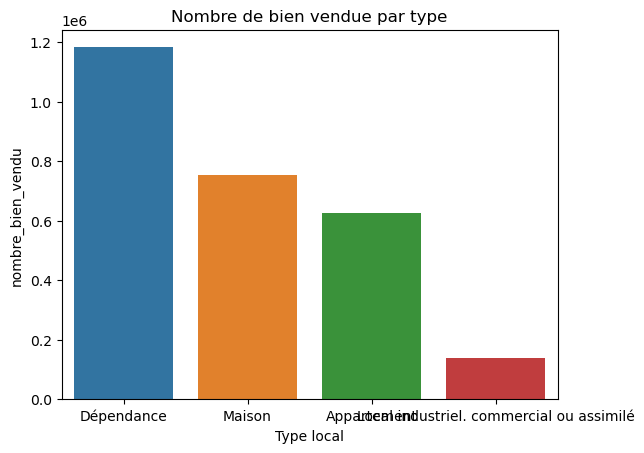

In [662]:
sns.barplot(y='nombre_bien_vendu', x='Type local', data= v1,label="Total")
plt.ylabel('nombre_bien_vendu')
plt.xlabel('Type local')
plt.title('Nombre de bien vendue par type')
plt.show()

## Nombre de bien non vendue par type

In [664]:
v4 = """ select count(*) as nombre_bien_non_vendu, `Type local` 
from bien as b inner join vente as v  on b.id_bien=v.id_vente  
where `Nature mutation` != 'Vente' AND `Type local`  IS NOT NULL
group by `Type local`
ORDER BY nombre_bien_non_vendu DESC """
v4 = pd.read_sql(v4, conn)
v4

,nombre_bien_non_vendu,Type local
0,20598,Dépendance
1,12033,Appartement
2,3907,Maison
3,3581,Local industriel. commercial ou assimilé


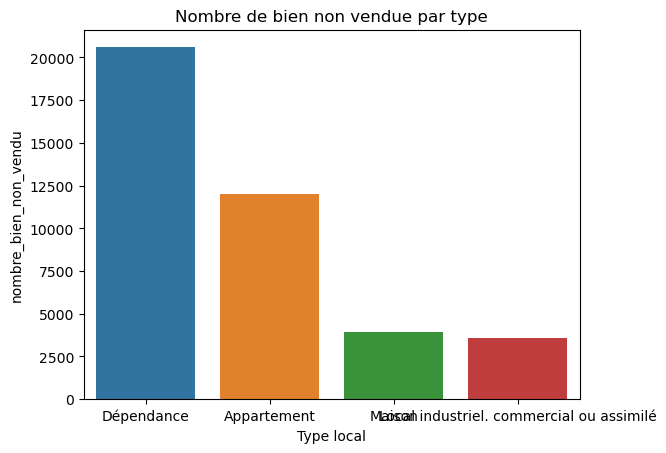

In [666]:
sns.barplot(y='nombre_bien_non_vendu', x='Type local', data= v4)
plt.ylabel('nombre_bien_non_vendu')
plt.xlabel('Type local')
plt.title('Nombre de bien non vendue par type')
plt.show()

## Les 10 ventes les plus chere 

In [686]:
v2 = """ select   id_bien , `Valeur fonciere`, `Type local`
from bien as b inner join vente as v  on b.id_bien=v.id_vente 
WHERE `Surface terrain` != 0
ORDER BY  `Valeur fonciere` DESC LIMIT 5 """
v2 = pd.read_sql(v2, conn)
v2

,id_bien,Valeur fonciere,Type local
0,2717284,722590020.0,Maison
1,2717285,722590020.0,Dépendance
2,4545548,606210300.0,Local industriel. commercial ou assimilé
3,4545549,606210300.0,Appartement
4,4545550,606210300.0,Appartement


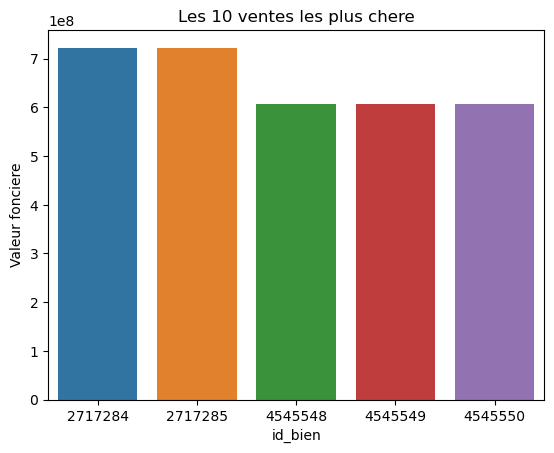

In [687]:
sns.barplot(x='id_bien', y='Valeur fonciere', data= v2, label="Total")
plt.xlabel('id_bien')
plt.ylabel('Valeur fonciere')
plt.title('Les 10 ventes les plus chere')
plt.show()

## Les 10 ventes les moins chere

In [668]:
v3 = """ select   id_bien , `Valeur fonciere`, `Type local`, `Surface terrain`
from bien as b inner join vente as v  on b.id_bien=v.id_vente 
WHERE `Valeur fonciere` != 0 AND  `Surface terrain` != 0 AND `Type local` IS NOT NULL
ORDER BY  `Valeur fonciere` ASC LIMIT 5 """
v3  = pd.read_sql(v3, conn)
v3

,id_bien,Valeur fonciere,Type local,Surface terrain
0,4173321,0.15,Local industriel. commercial ou assimilé,2750.0
1,2014458,0.15,Local industriel. commercial ou assimilé,12326.0
2,2876439,0.15,Local industriel. commercial ou assimilé,4492.0
3,2876440,0.15,Local industriel. commercial ou assimilé,1659.0
4,3013645,1.00,Local industriel. commercial ou assimilé,675.0


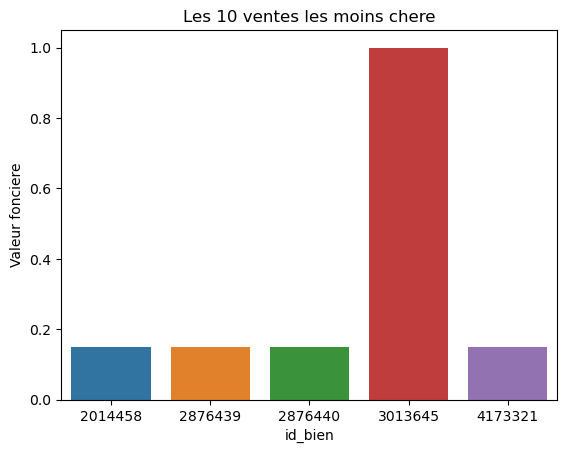

In [669]:
sns.barplot(x='id_bien', y='Valeur fonciere', data= v3, label="Total")
plt.xlabel('id_bien')
plt.ylabel('Valeur fonciere')
plt.title('Les 10 ventes les moins chere')
plt.show()

## nombre de bien vendu par mois

In [673]:
v5 = """ select count(*) as nombre_bien_vendu_mois, `Type local`, MONTH(`Date mutation`) AS MOIS 
from bien as b inner join vente as v  on b.id_bien=v.id_vente  
where `Nature mutation` = 'Vente' group by Month(`Date mutation`)  """
v5 = pd.read_sql(v5, conn)
v5

,nombre_bien_vendu_mois,Type local,MOIS
0,302258,Appartement,1
1,312561,Maison,2
2,380647,Maison,3
3,341337,Dépendance,4
4,354260,Local industriel. commercial ou assimilé,5
5,413243,Dépendance,6
6,421376,Dépendance,7
7,286524,None,8
8,388308,Maison,9
9,332525,Dépendance,10


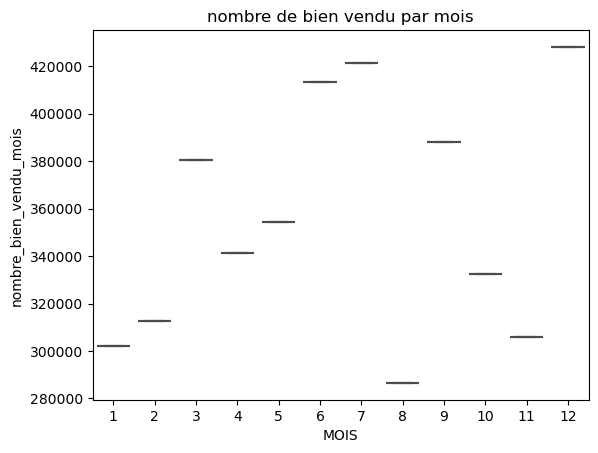

In [681]:
sns.boxplot(data=v5, x="MOIS", y="nombre_bien_vendu_mois", whis=(0, 100), color='b' )
plt.xlabel('MOIS')
plt.ylabel('nombre_bien_vendu_mois')
plt.title('nombre de bien vendu par mois')
plt.show()

## Types les plus vendue par mois 

In [693]:
p = """ select count(*) AS nombre_type_plus_vendu_mois, `Type local`, MONTH(`Date mutation`) AS MOIS
from bien as b inner join vente as v  on b.id_bien=v.id_vente 
where `Type local` IS NOT NULL
GROUP by  MONTH(`Date mutation`)  """ 
p = pd.read_sql(p, conn)
p

,nombre_type_plus_vendu_mois,Type local,MOIS
0,194818,Appartement,1
1,201118,Maison,2
2,238148,Maison,3
3,216205,Dépendance,4
4,227574,Local industriel. commercial ou assimilé,5
5,273184,Dépendance,6
6,280157,Dépendance,7
7,188472,Dépendance,8
8,255005,Maison,9
9,206759,Dépendance,10


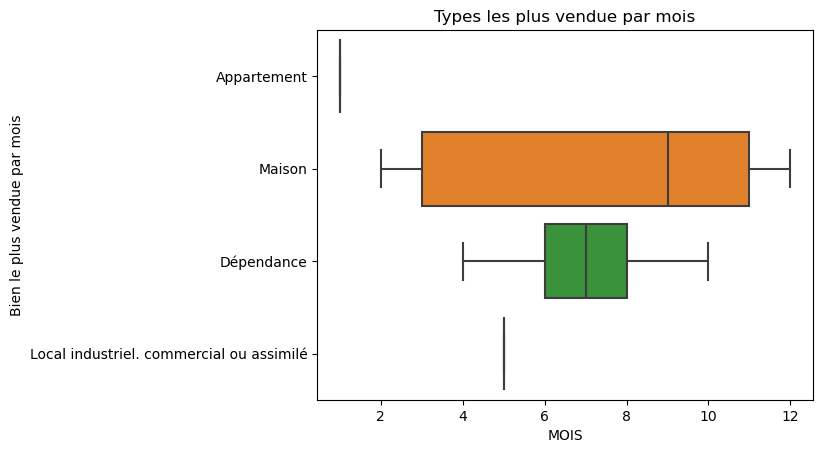

In [695]:
sns.boxplot(data=p, x="MOIS", y="Type local", whis=(0, 100) )
plt.xlabel('MOIS')
plt.ylabel('Bien le plus vendue par mois')
plt.title('Types les plus vendue par mois')
plt.show()

## Nombre de bien non vendue par mois 

In [526]:
p = """ select count(*) as nombre, `Type local`, `Date mutation` 
from bien as b inner join vente as v  on b.id_bien=v.id_vente  
where `Nature mutation` != 'Vente'
group by Month(`Date mutation`) """
p = pd.read_sql(p, conn)
p

,nombre,Type local,Date mutation
0,20802,Appartement,2022-01-03
1,22427,Maison,2022-02-04
2,30062,None,2022-03-02
3,24467,None,2022-04-04
4,26650,Dépendance,2022-05-04
5,32268,Appartement,2022-06-06
6,27732,None,2022-07-06
7,16014,None,2022-08-01
8,28836,None,2022-09-01
9,26844,Appartement,2022-10-04


## Somme des valeurs foncieres des ventes par mois 

In [696]:
p = """ select sum(`Valeur fonciere`) as sum_valeurs_foncieres_par_mois, MONTH(`Date mutation`) AS MOIS 
from bien as b inner join vente as v  on b.id_bien=v.id_vente
where `Nature mutation` = 'Vente' 
AND `Surface terrain` != 0 AND `Valeur fonciere`<5000000
GROUP BY Month(`Date mutation`)
ORDER BY  `Valeur fonciere` DESC """
p = pd.read_sql(p, conn)
p

,sum_valeurs_foncieres_par_mois,MOIS
0,8.391620e+10,7
1,6.181188e+10,5
2,6.403752e+10,10
3,7.554314e+10,9
4,7.240731e+10,6
5,5.156365e+10,2
6,6.163758e+10,4
7,5.613131e+10,1
8,6.517752e+10,3
9,8.924403e+10,12


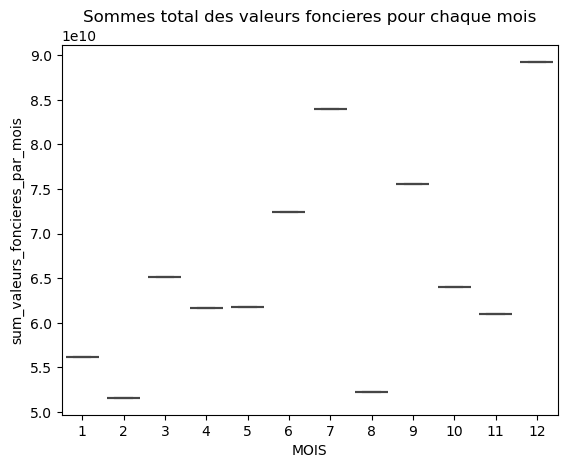

In [703]:
sns.boxplot(data=p, x="MOIS", y="sum_valeurs_foncieres_par_mois", whis=(0, 100) )
plt.xlabel('MOIS')
plt.ylabel('sum_valeurs_foncieres_par_mois')
plt.title('Sommes total des valeurs foncieres pour chaque mois')
plt.show()

## Moyenne des valeurs foncieres des ventes par mois

In [705]:
p = """ select AVG(`Valeur fonciere`) as valeur_fonciere_total, MONTH(`Date mutation`) AS MOIS 
from bien as b inner join vente as v  on b.id_bien=v.id_vente
where `Nature mutation` = 'Vente' 
AND `Surface terrain` != 0 AND `Valeur fonciere`<5000000
GROUP BY Month(`Date mutation`)
ORDER BY  `Valeur fonciere` DESC LIMIT 20 """
p = pd.read_sql(p, conn)
p

,valeur_fonciere_total,MOIS
0,286869.436955,7
1,255374.569300,5
2,272016.248393,10
3,287133.647329,9
4,265384.755793,6
5,240648.003739,2
6,262994.879588,4
7,268563.132100,1
8,247505.198642,3
9,319444.003769,12


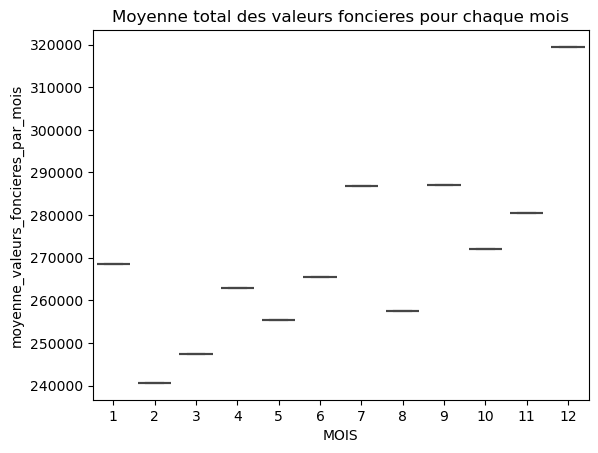

In [706]:
sns.boxplot(data=p, x="MOIS", y="valeur_fonciere_total", whis=(0, 100) )
plt.xlabel('MOIS')
plt.ylabel('moyenne_valeurs_foncieres_par_mois')
plt.title('Moyenne total des valeurs foncieres pour chaque mois')
plt.show()

## Nombre de mutation par code departement

In [739]:
p = """ select count(*) as nombre_mutation, `Code departement`
from vente as v INNER JOIN localisation as l ON v.id_vente=l.id_localisation 
group by `Code departement` 
ORDER BY nombre_mutation DESC LIMIT 20 """
p = pd.read_sql(p, conn)
p

,nombre_mutation,Code departement
0,122665,59
1,119757,33
2,108534,13
3,106606,83
4,106519,69
5,106001,6
6,100589,44
7,97971,75
8,97142,31
9,96656,34


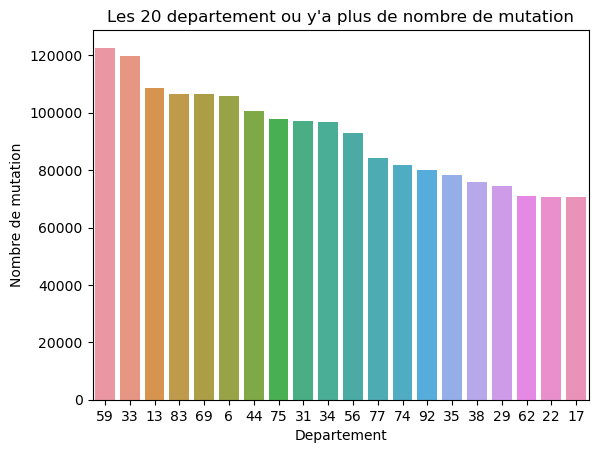

In [741]:
sns.barplot(data= p, y='nombre_mutation', x='Code departement')
plt.title("Les 20 departement ou y'a plus de nombre de mutation")
plt.ylabel('Nombre de mutation')
plt.xlabel('Departement')
plt.show()

## Nombre de bien vendu par code departement

In [737]:
p = """ select count(*) as nombre_vendu, `Code departement`
from vente as v INNER JOIN localisation as l ON v.id_vente=l.id_localisation 
WHERE `Nature mutation` = 'Vente'
group by `Code departement` 
ORDER BY nombre_vendu desc LIMIT 20 """
p = pd.read_sql(p, conn)
p

,nombre_vendu,Code departement
0,113224,59
1,108375,33
2,97946,6
3,97330,83
4,96123,75
5,95313,13
6,93249,69
7,90936,44
8,89465,56
9,85217,34


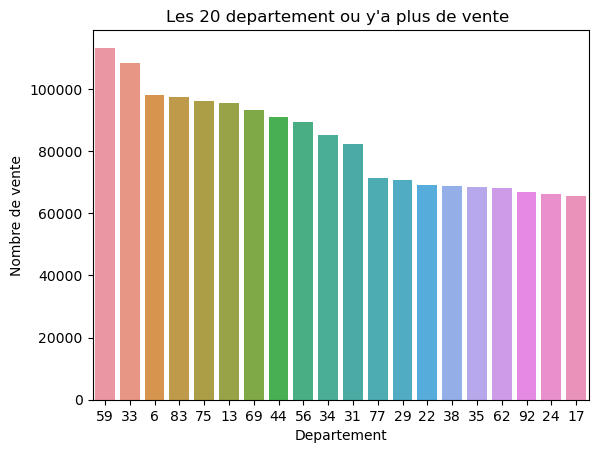

In [738]:
sns.barplot(data= p, y='nombre_vendu', x='Code departement')
plt.title("Les 20 departement ou y'a plus de vente ")
plt.ylabel('Nombre de vente')
plt.xlabel('Departement')
plt.show()

## vente terrain a batir par departementt

In [735]:
p = """ select count(*) as nombre_terrain_batir, `Code departement`
from vente as v INNER JOIN localisation as l ON v.id_vente=l.id_localisation 
WHERE `Nature mutation` = 'Vente terrain à bâtir'
group by `Code departement` 
order by nombre_terrain_batir desc LIMIT 20 """
p = pd.read_sql(p, conn)
p

,nombre_terrain_batir,Code departement
0,868,35
1,655,85
2,604,44
3,506,29
4,476,34
5,430,49
6,394,40
7,375,31
8,350,974
9,335,17


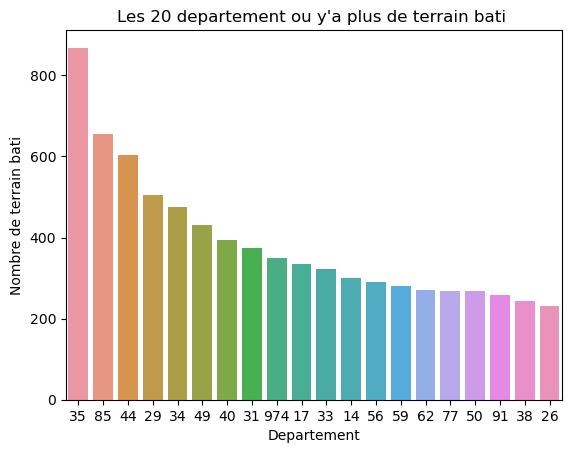

In [736]:
sns.barplot(data= p, y='nombre_terrain_batir', x='Code departement')
plt.title("Les 20 departement ou y'a plus de terrain bati ")
plt.ylabel('Nombre de terrain bati')
plt.xlabel('Departement')
plt.show()

## Adjudication par departement

In [729]:
p = """ select count(*) as nombre_adjudication, `Code departement`
from vente as v INNER JOIN localisation as l ON v.id_vente=l.id_localisation 
WHERE `Nature mutation` = 'Adjudication'
group by `Code departement` 
order by nombre_adjudication desc LIMIT 20"""
p = pd.read_sql(p, conn)
p

,nombre_adjudication,Code departement
0,335,6
1,325,59
2,308,95
3,291,93
4,269,70
5,242,33
6,239,77
7,228,37
8,226,24
9,220,13


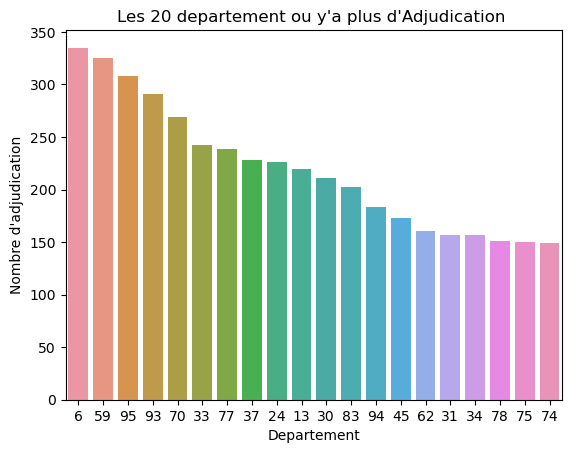

In [732]:
sns.barplot(data= p, y='nombre_adjudication', x='Code departement')
plt.title("Les 20 departement ou y'a plus d'Adjudication ")
plt.ylabel("Nombre d'adjudication")
plt.xlabel('Departement')
plt.show()

## 